In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [111]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [112]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [113]:
train.dtypes

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object

In [114]:
train = train.drop(['pet_id','issue_date','listing_date'],axis =1)
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
2,NaN,Brown,0.15,40.90,15,4,2.0,4
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1


In [115]:
train.corr()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
condition,1.000000,-0.011219,-0.010793,0.338843,0.381696,-0.483503,-0.041660
length(m),-0.011219,1.000000,-0.004464,-0.002893,-0.011175,0.007229,-0.003999
height(cm),-0.010793,-0.004464,1.000000,-0.003801,-0.008216,0.011647,0.001976
X1,0.338843,-0.002893,-0.003801,1.000000,0.584396,0.240729,-0.032594
X2,0.381696,-0.011175,-0.008216,0.584396,1.000000,0.052530,-0.032116
breed_category,-0.483503,0.007229,0.011647,0.240729,0.052530,1.000000,0.209230
pet_category,-0.041660,-0.003999,0.001976,-0.032594,-0.032116,0.209230,1.000000


In [116]:
train.dtypes

condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object

In [117]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder to convert the color (categorical variables) to numeric trainable values

le = LabelEncoder()
train['color_type'] = le.fit_transform(train['color_type'])
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1
1,1.0,53,0.72,14.19,13,9,0.0,2
2,NaN,15,0.15,40.90,15,4,2.0,4
3,1.0,53,0.62,17.82,0,1,0.0,2
4,2.0,2,0.50,11.06,18,4,0.0,1


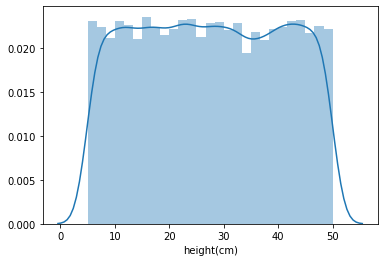

In [118]:
sns.distplot(train['height(cm)'])

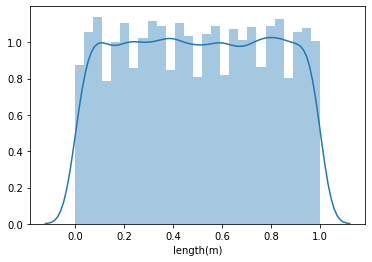

In [119]:
sns.distplot(train['length(m)'])

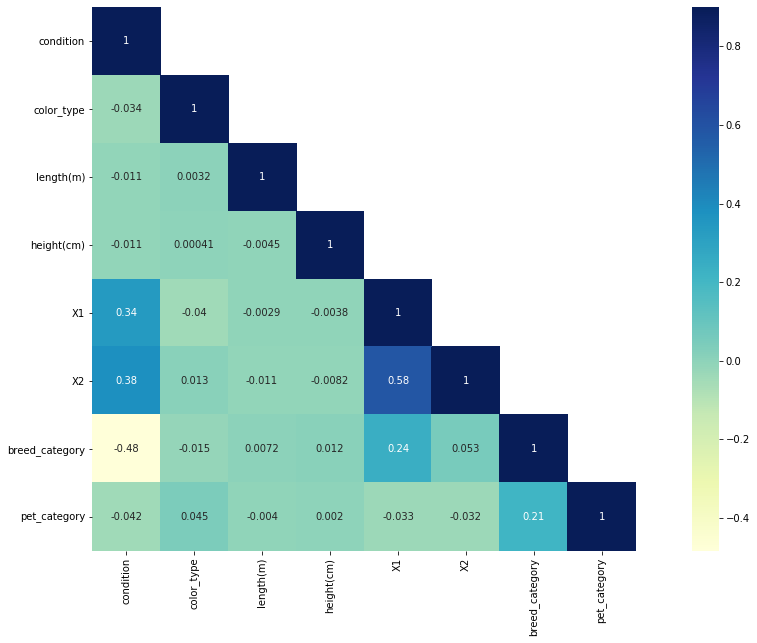

In [120]:
#Correlation between the values
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [121]:
train.isnull().sum()

condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [122]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1
1,1.0,53,0.72,14.19,13,9,0.0,2
2,NaN,15,0.15,40.90,15,4,2.0,4
3,1.0,53,0.62,17.82,0,1,0.0,2
4,2.0,2,0.50,11.06,18,4,0.0,1


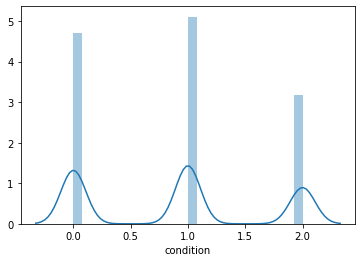

In [123]:
sns.distplot(train["condition"])

In [124]:
train['condition'].mode()

0    1.0
dtype: float64

In [125]:
train['condition'] = train['condition'].fillna(1)

In [126]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1
1,1.0,53,0.72,14.19,13,9,0.0,2
2,1.0,15,0.15,40.90,15,4,2.0,4
3,1.0,53,0.62,17.82,0,1,0.0,2
4,2.0,2,0.50,11.06,18,4,0.0,1


In [127]:
train.isnull().sum()

condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

In [128]:
X = np.array(train.iloc[:,0:6])
Y = train.iloc[:,6:]
X.shape,Y.shape

((18834, 6), (18834, 2))

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 4)

In [130]:
Y_test.columns

Index(['breed_category', 'pet_category'], dtype='object')

In [131]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [132]:
Y_predicted = classifier.predict(X_test)
Y_predicted

array([[0., 2.],
       [0., 2.],
       [1., 2.],
       ...,
       [0., 2.],
       [2., 1.],
       [1., 1.]])

In [133]:
y_pred_0 = list()
y_pred_1 = list()
for i in Y_predicted:
    y_pred_0.append(i[0])
    y_pred_1.append(i[1])

In [134]:
from sklearn.metrics import f1_score
s1 = f1_score(Y_test["breed_category"],y_pred_0,average='weighted')
s2 = f1_score(Y_test["pet_category"],y_pred_1,average='weighted')
score = 100*(s1+s2)/2
score

82.81094717408249

In [135]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [136]:
X_val = test.iloc[:,3:]
X_val.head()

,condition,color_type,length(m),height(cm),X1,X2
0,0.0,Black,0.87,42.73,0,7
1,1.0,Orange Tabby,0.06,6.71,0,1
2,1.0,Black,0.24,41.21,0,7
3,1.0,Black,0.29,8.46,7,1
4,1.0,Brown,0.71,30.92,0,7


In [137]:
X_val['color_type'] = le.transform(X_val['color_type'])

In [138]:
X_val.isnull().sum()

condition     619
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64

In [141]:
X_val['condition'] = X_val['condition'].fillna(1)
X_val.head()

,condition,color_type,length(m),height(cm),X1,X2
0,0.0,2,0.87,42.73,0,7
1,1.0,38,0.06,6.71,0,1
2,1.0,2,0.24,41.21,0,7
3,1.0,2,0.29,8.46,7,1
4,1.0,15,0.71,30.92,0,7


In [142]:
X_val.isnull().sum()

condition     0
color_type    0
length(m)     0
height(cm)    0
X1            0
X2            0
dtype: int64

In [144]:
Y_val = classifier.predict(X_val)
Y_val = pd.DataFrame(Y_val)
Y_val.head()

,0,1
0,1.0,2.0
1,0.0,1.0
2,0.0,2.0
3,0.0,2.0
4,0.0,2.0


In [145]:
submissions=pd.DataFrame({"pet_id": test['pet_id'],
                         "breed_category": Y_val[0],
                         "pet_category" : Y_val[1]})

submissions.to_csv('submissions.csv',index = False, header = True)